# Closeness centrality ke 2

**Kita cek terlebih dahulu website tersebut bisa kita crawling apa tidak **

In [ ]:
import requests

url = "https://www.jpnn.com/"
response = requests.get(url)

# Periksa status code
if response.status_code == 200:
    print("Halaman berhasil diakses.")
elif response.status_code == 404:
    print("Halaman tidak ditemukan.")
else:
    print(f"Terjadi kesalahan. Status code: {response.status_code}")


Halaman berhasil diakses.


## Langkah 1: Crawl data judul berita dan isi berita dari https://jpnn.com/

## Politik

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import date, timedelta

# get_article_content(article_url) digunakan untuk mengambil konten artikel dari URL yang diberikan.
def get_article_content(article_url):
    response = requests.get(article_url)

    # untuk memeriksa apakah status kode respons adalah 200, yang berarti permintaan berhasil kemudian mengambil konten artikel dari elemen div
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('div', itemprop="articleBody").find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

# scrape_news_data(start_date, end_date) digunakan untuk mengambil data berita dari situs web jpnn.com dalam rentang tanggal tertentu.
def scrape_news_data(start_date, end_date):
    base_url = "https://www.jpnn.com/indeks?id=248&d={day}&m={month}&y={year}&tab=all"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(day=current_date.day, month=current_date.month, year=current_date.year)
        response = requests.get(url)

        # untuk memeriksa apakah status kode respons adalah 200, yang berarti permintaan berhasil kemudian mengambil judul berita dari elemen div
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find('div', class_="content").find_all('h1')

            for element in news_elements:
                title = element.a.text
                article_url = element.a['href']
                content = get_article_content(article_url)

                # Data berita disimpan dalam sebuah list dictionary dengan kunci 'Date', 'Title', dan 'Content'
                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

# Untuk menentukan rentang waktu untuk pengambilan data berita.
from datetime import date, timedelta
start_date = date(2023, 10, 1)
end_date = date(2023, 11, 1)

news_data = scrape_news_data(start_date, end_date)


In [ ]:
# Untuk membuat DataFrame dari data berita yang dikumpulkan oleh fungsi scrape_news_data(start_date, end_date)
df = pd.DataFrame(news_data)

In [ ]:
# untuk menghapus karakter baris baru ('\n') dari kolom 'Title' dalam DataFrame df
df['Title'] = df['Title'].str.replace('\n', '')

In [ ]:
# menambahkan kolom baru bernama 'Label' ke dalam DataFrame df dan mengisinya dengan nilai 'politik' untuk setiap baris
df['Label'] = 'politik'

In [ ]:
# menampilkan data
df

,Date,Title,Content,Label
0,01-10-2023,Megawati Ungkap Orang Luar Tak Bisa Langsung J...,"jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...",politik
1,01-10-2023,"Peringati Hari Kesaktian Pancasila, KawanJuang...","jpnn.com, PURWAKARTA - Para sukarelawan penduk...",politik
2,01-10-2023,"Ganjar dan Anies Hadiri Acara IdeaFest, di Man...","jpnn.com, JAKARTA - Ketiga bacapres Ganjar Pra...",politik
3,01-10-2023,"Silaturahmi ke Rembang, Anies Diberi Tongkat K...","jpnn.com, JAKARTA - Anies Baswedan mengunjungi...",politik
4,01-10-2023,"Survei Erick Thohir Teratas di Jatim, Pengamat...","jpnn.com, JAKARTA - Nama Erick Thohir punya ke...",politik
...,...,...,...,...
635,01-11-2023,Ribuan Warga Aceh Berzikir & Selawat Bersama A...,"jpnn.com, ACEH UTARA - Puluhan ribu rakyat Ace...",politik
636,01-11-2023,Mendagri Tito Karnavian Dorong Polri Aktif Awa...,"jpnn.com, JAKARTA - Menteri Dalam Negeri (Men...",politik
637,01-11-2023,"PKPU Nomor 19 Sudah Direvisi, tetapi Gibran Be...",jpnn.com - JAKARTA - Komisi II DPR RI dan peme...,politik
638,01-11-2023,Survei: Masyarakat Jateng Mulai Masif Mendukun...,jpnn.com - JAKARTA - Hasil survei terbaru Poll...,politik


In [ ]:
# Simpan DataFrame ke file CSV
df.to_csv('jnn_politik_news.csv', index=False)

## Ekonomi

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import date, timedelta

# get_article_content(article_url) digunakan untuk mengambil konten artikel dari URL yang diberikan.
def get_article_content(article_url):
    response = requests.get(article_url)

    # untuk memeriksa apakah status kode respons adalah 200, yang berarti permintaan berhasil kemudian mengambil konten artikel dari elemen div
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('div', itemprop="articleBody").find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

# scrape_news_data(start_date, end_date) digunakan untuk mengambil data berita dari situs web jpnn.com dalam rentang tanggal tertentu.
def scrape_news_data(start_date, end_date):
    base_url = "https://www.jpnn.com/indeks?id=216&d=01&m=10&y=2023&tab=all"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(day=current_date.day, month=current_date.month, year=current_date.year)
        response = requests.get(url)

        # untuk memeriksa apakah status kode respons adalah 200, yang berarti permintaan berhasil kemudian mengambil judul berita dari elemen div
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find('div', class_="content").find_all('h1')

            for element in news_elements:
                title = element.a.text
                article_url = element.a['href']
                content = get_article_content(article_url)

                # Data berita disimpan dalam sebuah list dictionary dengan kunci 'Date', 'Title', dan 'Content'
                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

# Untuk menentukan rentang waktu untuk pengambilan data berita.
from datetime import date, timedelta
start_date = date(2023, 10, 1)
end_date = date(2023, 11, 1)

news_data = scrape_news_data(start_date, end_date)


In [ ]:
# Untuk membuat DataFrame dari data berita yang dikumpulkan oleh fungsi scrape_news_data(start_date, end_date)
df2 = pd.DataFrame(news_data)

In [ ]:
# menghapus karakter tab ('\t') dari kolom 'Title' dan karakter baris baru ('\n') dari kolom 'Content'
df2['Title'] = df2['Title'].str.replace('\t', '')
df2['Content'] = df2['Content'].str.replace('\n', '')

In [ ]:
# menambahkan kolom baru bernama 'Label' ke dalam DataFrame df dan mengisinya dengan nilai 'Ekonomi' untuk setiap baris
df2['Label'] = 'Ekonomi'

In [ ]:
# menampilkan data
df2

,Date,Title,Content,Label
0,01-10-2023,Erick Thohir Mengaku Jatuh Cinta pada Program ...,"jpnn.com, JAKARTA - Menteri Badan Usaha Milik ...",Ekonomi
1,01-10-2023,Menteri Bahlil Pastikan Investasi Rempang Berd...,"jpnn.com, JAKARTA - Menteri Investasi/Kepala B...",Ekonomi
2,01-10-2023,"Gandeng LKPP, Pertamina Implementasikan Aplika...","jpnn.com, JAKARTA - PT Pertamina (Persero) men...",Ekonomi
3,01-10-2023,"Kini Fokus Jadi Entrepreneur, Zahra Amalina Me...","jpnn.com, JAKARTA - Model sekaligus pemain sin...",Ekonomi
4,01-10-2023,"Terapkan ESG, OCS Group Gandeng World Cleanup ...","jpnn.com, JAKARTA - OCS Group Indonesia mengua...",Ekonomi
...,...,...,...,...
507,01-11-2023,Ikhitiar Pinjam Yuk Mendorong UMKM Kembangkan ...,"jpnn.com, JAKARTA - Platform peer to peer lend...",Ekonomi
508,01-11-2023,Gegara Ini Industri Kreatif di Berbagai Daerah...,"jpnn.com, JAKARTA - Pelaku industri kreatif di...",Ekonomi
509,01-11-2023,"Kinerja Moncer, KAI Logistik Raih Penghargaan ...","jpnn.com, JAKARTA - KAI Logistik meraih pengha...",Ekonomi
510,01-11-2023,"Bicara di Diskusi Pameran Pangan, Ketua Aprind...","jpnn.com, JAKARTA PUSAT - Ketua Asosiasi Pengu...",Ekonomi


In [ ]:
# Simpan DataFrame ke file CSV
df2.to_csv('jpnn_ekonomi_news.csv', index=False)

## Olahraga

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import date, timedelta

# get_article_content(article_url) digunakan untuk mengambil konten artikel dari URL yang diberikan.
def get_article_content(article_url):
    response = requests.get(article_url)

    # untuk memeriksa apakah status kode respons adalah 200, yang berarti permintaan berhasil kemudian mengambil konten artikel dari elemen div
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('div', itemprop="articleBody").find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

# scrape_news_data(start_date, end_date) digunakan untuk mengambil data berita dari situs web jpnn.com dalam rentang tanggal tertentu.
def scrape_news_data(start_date, end_date):
    base_url = "https://www.jpnn.com/indeks?id=213&d=01&m=10&y=2023&tab=all"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(day=current_date.day, month=current_date.month, year=current_date.year)
        response = requests.get(url)

        # untuk memeriksa apakah status kode respons adalah 200, yang berarti permintaan berhasil kemudian mengambil judul berita dari elemen div
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find('div', class_="content").find_all('h1')

            for element in news_elements:
                title = element.a.text
                article_url = element.a['href']
                content = get_article_content(article_url)

                # Data berita disimpan dalam sebuah list dictionary dengan kunci 'Date', 'Title', dan 'Content'
                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

# Untuk menentukan rentang waktu untuk pengambilan data berita.
from datetime import date, timedelta
start_date = date(2023, 10, 1)
end_date = date(2023, 11, 1)

news_data_olahraga = scrape_news_data(start_date, end_date)


In [ ]:
# Untuk membuat DataFrame dari data berita yang dikumpulkan oleh fungsi scrape_news_data(start_date, end_date)
df3 = pd.DataFrame(news_data_olahraga)

In [ ]:
# menghapus karakter tab ('\t') dari kolom 'Title' dan karakter baris baru ('\n') dari kolom 'Content'
df3['Title'] = df3['Title'].str.replace('\t', '')
df3['Content'] = df3['Content'].str.replace('\n', '')

In [ ]:
# menambahkan kolom baru bernama 'Label' ke dalam DataFrame df dan mengisinya dengan nilai 'Olahraga' untuk setiap baris
df3['Label'] = 'Olahraga'

In [ ]:
# menampilkan data
df3

,Date,Title,Content,Label
0,01-10-2023,"Klasemen Liga 1: Berpesta Gol, Persib Bandung ...",jpnn.com - BANDUNG - Persib Bandung membukukan...,Olahraga
1,01-10-2023,Menpora Dito Ariotedjo Ungkap Peran Anak Muda ...,jpnn.com - Menteri Pemuda dan Olahraga (Menpor...,Olahraga
2,01-10-2023,"China Belum Bisa Menang di Road to Paris, Liha...",jpnn.com - XI’AN – China menelan kekalahan ked...,Olahraga
3,01-10-2023,"Road to Paris: Mesir Bikin Jepang Menderita, A...",jpnn.com - TOKYO – Kejutan besar terjadi pada ...,Olahraga
4,01-10-2023,Lagi! Veda Ega Bikin Pembalap Tuan Rumah Tak B...,"jpnn.com, JAKARTA - Pembalap muda Indonesia Ve...",Olahraga
...,...,...,...,...
571,01-11-2023,"Lalu Muhammad Zohri Finis Keenam, Indonesia Pa...","jpnn.com, JAKARTA - Kontingen atlet Indonesia ...",Olahraga
572,01-11-2023,Garuda Muda Siap Beri Obat Pelipur Lara Bagi F...,jpnn.com - Tim bulu tangkis beregu campuran In...,Olahraga
573,01-11-2023,Bulu Tangkis Asian Games 2022: Tim Putra China...,jpnn.com - Tim bulu tangkis beregu putra China...,Olahraga
574,01-11-2023,"Asian Games 2022: Kehabisan Bensin, Timnas Bas...",jpnn.com - Timnas basket putra Indonesia menga...,Olahraga


In [ ]:
# Simpan DataFrame ke file CSV
df3.to_csv('jpnn_olahraga_news.csv', index=False)

## Gabungkan Data

In [ ]:
# menggabungkan tiga DataFrame df, df2, dan df3 menjadi satu DataFrame baru bernama combined_df.
combined_df = pd.concat([df, df2, df3], ignore_index=True)
combined_df

,Date,Title,Content,Label
0,01-10-2023,Megawati Ungkap Orang Luar Tak Bisa Langsung J...,"jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...",politik
1,01-10-2023,"Peringati Hari Kesaktian Pancasila, KawanJuang...","jpnn.com, PURWAKARTA - Para sukarelawan penduk...",politik
2,01-10-2023,"Ganjar dan Anies Hadiri Acara IdeaFest, di Man...","jpnn.com, JAKARTA - Ketiga bacapres Ganjar Pra...",politik
3,01-10-2023,"Silaturahmi ke Rembang, Anies Diberi Tongkat K...","jpnn.com, JAKARTA - Anies Baswedan mengunjungi...",politik
4,01-10-2023,"Survei Erick Thohir Teratas di Jatim, Pengamat...","jpnn.com, JAKARTA - Nama Erick Thohir punya ke...",politik
...,...,...,...,...
1723,01-11-2023,"Lalu Muhammad Zohri Finis Keenam, Indonesia Pa...","jpnn.com, JAKARTA - Kontingen atlet Indonesia ...",Olahraga
1724,01-11-2023,Garuda Muda Siap Beri Obat Pelipur Lara Bagi F...,jpnn.com - Tim bulu tangkis beregu campuran In...,Olahraga
1725,01-11-2023,Bulu Tangkis Asian Games 2022: Tim Putra China...,jpnn.com - Tim bulu tangkis beregu putra China...,Olahraga
1726,01-11-2023,"Asian Games 2022: Kehabisan Bensin, Timnas Bas...",jpnn.com - Timnas basket putra Indonesia menga...,Olahraga


In [ ]:
#menghitung jumlah kemunculan nilai unik pada kolom 'Label' dalam DataFrame combined_df
combined_df['Label'].value_counts()

politik     640
Olahraga    576
Ekonomi     512
Name: Label, dtype: int64

In [ ]:
# Simpan DataFrame ke file CSV
combined_df.to_csv('data_label_news.csv', index=False)

In [ ]:
# menampilkan keseluruhan data
combined_df

,Date,Title,Content,Label
0,01-10-2023,Megawati Ungkap Orang Luar Tak Bisa Langsung J...,"jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...",politik
1,01-10-2023,"Peringati Hari Kesaktian Pancasila, KawanJuang...","jpnn.com, PURWAKARTA - Para sukarelawan penduk...",politik
2,01-10-2023,"Ganjar dan Anies Hadiri Acara IdeaFest, di Man...","jpnn.com, JAKARTA - Ketiga bacapres Ganjar Pra...",politik
3,01-10-2023,"Silaturahmi ke Rembang, Anies Diberi Tongkat K...","jpnn.com, JAKARTA - Anies Baswedan mengunjungi...",politik
4,01-10-2023,"Survei Erick Thohir Teratas di Jatim, Pengamat...","jpnn.com, JAKARTA - Nama Erick Thohir punya ke...",politik
...,...,...,...,...
1723,01-11-2023,"Lalu Muhammad Zohri Finis Keenam, Indonesia Pa...","jpnn.com, JAKARTA - Kontingen atlet Indonesia ...",Olahraga
1724,01-11-2023,Garuda Muda Siap Beri Obat Pelipur Lara Bagi F...,jpnn.com - Tim bulu tangkis beregu campuran In...,Olahraga
1725,01-11-2023,Bulu Tangkis Asian Games 2022: Tim Putra China...,jpnn.com - Tim bulu tangkis beregu putra China...,Olahraga
1726,01-11-2023,"Asian Games 2022: Kehabisan Bensin, Timnas Bas...",jpnn.com - Timnas basket putra Indonesia menga...,Olahraga


In [ ]:
# menampilkan data pada kolom Content
combined_df['Content']

0       jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...
1       jpnn.com, PURWAKARTA - Para sukarelawan penduk...
2       jpnn.com, JAKARTA - Ketiga bacapres Ganjar Pra...
3       jpnn.com, JAKARTA - Anies Baswedan mengunjungi...
4       jpnn.com, JAKARTA - Nama Erick Thohir punya ke...
                              ...                        
1723    jpnn.com, JAKARTA - Kontingen atlet Indonesia ...
1724    jpnn.com - Tim bulu tangkis beregu campuran In...
1725    jpnn.com - Tim bulu tangkis beregu putra China...
1726    jpnn.com - Timnas basket putra Indonesia menga...
1727    jpnn.com - CATALONIA - Real Madrid kembali mem...
Name: Content, Length: 1728, dtype: object

## Langkah 2: Meringkas Fitur Content(Spacy)

In [1]:
import pandas as pd

In [2]:
# menghubungkan ke drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# membaca file CSV yang berada pada path dan menyimpannya dalam sebuah DataFrame bernama data.
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/Data/data_label_news.csv")
data

,Date,Title,Content,Label
0,01-10-2023,Megawati Ungkap Orang Luar Tak Bisa Langsung J...,"jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...",politik
1,01-10-2023,"Peringati Hari Kesaktian Pancasila, KawanJuang...","jpnn.com, PURWAKARTA - Para sukarelawan penduk...",politik
2,01-10-2023,"Ganjar dan Anies Hadiri Acara IdeaFest, di Man...","jpnn.com, JAKARTA - Ketiga bacapres Ganjar Pra...",politik
3,01-10-2023,"Silaturahmi ke Rembang, Anies Diberi Tongkat K...","jpnn.com, JAKARTA - Anies Baswedan mengunjungi...",politik
4,01-10-2023,"Survei Erick Thohir Teratas di Jatim, Pengamat...","jpnn.com, JAKARTA - Nama Erick Thohir punya ke...",politik
...,...,...,...,...
1723,01-11-2023,"Lalu Muhammad Zohri Finis Keenam, Indonesia Pa...","jpnn.com, JAKARTA - Kontingen atlet Indonesia ...",Olahraga
1724,01-11-2023,Garuda Muda Siap Beri Obat Pelipur Lara Bagi F...,jpnn.com - Tim bulu tangkis beregu campuran In...,Olahraga
1725,01-11-2023,Bulu Tangkis Asian Games 2022: Tim Putra China...,jpnn.com - Tim bulu tangkis beregu putra China...,Olahraga
1726,01-11-2023,"Asian Games 2022: Kehabisan Bensin, Timnas Bas...",jpnn.com - Timnas basket putra Indonesia menga...,Olahraga


In [4]:
#install library
!pip install sastrawi
!pip install swifter
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=3a603bfeb152fd371077c3d921c7df7df4264176a35de8b93db665c25ee7e542
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [5]:
# Impor pustaka spaCy
import spacy

# Memuat model bahasa Inggris spaCy
nlp = spacy.load("en_core_web_sm")

# Berikan berita yang ingin diringkas
berita = data['Content'].iloc[1700]

# Analisis teks menggunakan spaCy
doc = nlp(berita)

# Meringkas teks dengan mengekstrak kalimat-kalimat utama
kalimat_utama = [kalimat.text for kalimat in doc.sents]
ringkasan = " ".join(kalimat_utama[:5])  # Mengambil dua kalimat pertama sebagai ringkasan

# Cetak ringkasan
print(ringkasan)


jpnn.com - TOCHIGI – Bendera merah terpaksa dikibarkan saat race MotoGP Jepang 2023 di Mobility Resort Motegi, Minggu (1/10) siang WIB baru setengah jalan. Kondisi trek yang tergenang air membuat keselamatan pembalap terancam. Saat red flag berkibar, Jorge Martin memimpin, disusul Francesco Bagnaia, dan Marc Marquez. Tak lama setelah seluruh pembalap tiba di garasinya masing-masing, hujan deras benar-benar mengguyur Mobility Resort Motegi. Sebelumnya, seluruh pembalap sudah mengganti motornya (penyesuaian ban).


## Langkah 3: TF IDF

In [6]:
pip install nltk

In [7]:
# mengimpor dan mengonfigurasi pustaka Natural Language Toolkit (NLTK) dan Scikit-learn untuk melakukan pemrosesan teks dan ekstraksi fitur.
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
# menghitung matriks TF-IDF dari kalimat-kalimat tersebut menggunakan kelas TfidfVectorizer
kalimat = nltk.sent_tokenize(ringkasan)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()

for i, sentence in enumerate(kalimat):
    print(f"Kalimat {i+1}: {sentence}")

Kalimat 1: jpnn.com - TOCHIGI – Bendera merah terpaksa dikibarkan saat race MotoGP Jepang 2023 di Mobility Resort Motegi, Minggu (1/10) siang WIB baru setengah jalan.
Kalimat 2: Kondisi trek yang tergenang air membuat keselamatan pembalap terancam.
Kalimat 3: Saat red flag berkibar, Jorge Martin memimpin, disusul Francesco Bagnaia, dan Marc Marquez.
Kalimat 4: Tak lama setelah seluruh pembalap tiba di garasinya masing-masing, hujan deras benar-benar mengguyur Mobility Resort Motegi.
Kalimat 5: Sebelumnya, seluruh pembalap sudah mengganti motornya (penyesuaian ban).


## Langkah 4: Cosine Similarity

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
# menghitung kesamaan kosinus antara setiap pasangan kalimat
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)):
        similarity = cosine_similarities[i][j]
        print(f"Similarity Kalimat {i+1} dan Kalimat {j+1}: {similarity:.4f}")

Similarity Kalimat 1 dan Kalimat 2: 0.0000
Similarity Kalimat 1 dan Kalimat 3: 0.0397
Similarity Kalimat 1 dan Kalimat 4: 0.1272
Similarity Kalimat 1 dan Kalimat 5: 0.0000
Similarity Kalimat 2 dan Kalimat 3: 0.0000
Similarity Kalimat 2 dan Kalimat 4: 0.0348
Similarity Kalimat 2 dan Kalimat 5: 0.0579
Similarity Kalimat 3 dan Kalimat 4: 0.0000
Similarity Kalimat 3 dan Kalimat 5: 0.0000
Similarity Kalimat 4 dan Kalimat 5: 0.0930


In [15]:
# membuat DataFrame similarity_df yang berisi matriks kesamaan kosinus antara setiap pasangan kalimat
similarity_df = pd.DataFrame(cosine_similarities, columns=range(len(kalimat)), index=range(len(kalimat)))
similarity_df

,0,1,2,3,4
0,1.000000,0.000000,0.039695,0.127231,0.000000
1,0.000000,1.000000,0.000000,0.034763,0.057913
2,0.039695,0.000000,1.000000,0.000000,0.000000
3,0.127231,0.034763,0.000000,1.000000,0.092958
4,0.000000,0.057913,0.000000,0.092958,1.000000


## Langkah 5: Graph

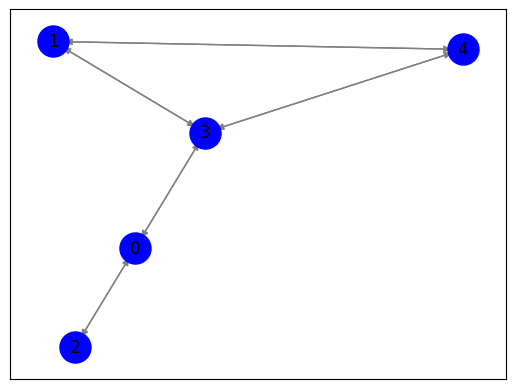

In [20]:
# menambahkan simpul ke graf untuk setiap kalimat dalam matriks kesamaan kosinus.
G = nx.DiGraph()
for i in range(len(cosine_similarities)):
    G.add_node(i)

# jika kesamaan kosinus lebih dari 0.02 dan indeks kalimat berbeda.
for i in range(len(cosine_similarities)):
    for j in range(len(cosine_similarities)):
        similarity = cosine_similarities[i][j]
        if similarity > 0.02 and i != j:
            G.add_edge(i, j)

# menghitung posisi simpul graf berarah G menggunakan algoritma spring layout
pos = nx.spring_layout(G)

# G (graf), pos (posisi simpul), node_size (ukuran simpul), dan node_color (warna simpul).
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')

# menentukan apakah sisi memiliki panah atau tidak.
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

# visualisasi graf berarah
plt.show()

## Langkah 6: Closeness Centrality

In [21]:
# menghitung closeness centrality dari setiap simpul pada graf berarah G, mengurutkannya secara menurun
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Closeness Centrality:")
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")


Sorted Closeness Centrality:
Node 3: 0.8000
Node 0: 0.6667
Node 1: 0.5714
Node 4: 0.5714
Node 2: 0.4444


In [22]:
# mencetak simpul dengan closeness centrality tertinggi beserta nilai closeness centrality
print("\nNode Tertinggi dengan Kalimat:")
for node, closeness in sorted_closeness[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: Closeness Centrality = {closeness:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Node Tertinggi dengan Kalimat:
Node 3: Closeness Centrality = 0.8000
Kalimat: Tak lama setelah seluruh pembalap tiba di garasinya masing-masing, hujan deras benar-benar mengguyur Mobility Resort Motegi.

Node 0: Closeness Centrality = 0.6667
Kalimat: jpnn.com - TOCHIGI – Bendera merah terpaksa dikibarkan saat race MotoGP Jepang 2023 di Mobility Resort Motegi, Minggu (1/10) siang WIB baru setengah jalan.

Node 1: Closeness Centrality = 0.5714
Kalimat: Kondisi trek yang tergenang air membuat keselamatan pembalap terancam.

